### I DID NOT USED RANDOMFORESTCLASSIFIER FOR THIS BINARY CLASSIFIER MODEL BCEAUSE IT GIVE ME THE ACCUERACY OF 99-100% WHICH LEAD TO OVERFITTING PROBLEM.

### SO I CHANGE THE ALGO TO LOGISTICREGRESSOR.

# Predict winner when 2nd inning is going on in terms of probability

In [1]:
import numpy as np 
import pandas  as pd

In [2]:
match = pd.read_csv('matches.csv')
delivery= pd.read_csv('deliveries.csv')

In [3]:
match.sample(4)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
642,7900,IPL-2018,Hyderabad,12-04-2018,Mumbai Indians,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,1,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",O Nandan,Nigel Llong,Vineet Kulkarni
209,210,IPL-2010,Nagpur,05-04-2010,Rajasthan Royals,Deccan Chargers,Rajasthan Royals,bat,normal,0,Rajasthan Royals,2,0,SK Warne,"Vidarbha Cricket Association Stadium, Jamtha",HDPK Dharmasena,SJA Taufel,NaN
35,36,IPL-2017,Hyderabad,30-04-2017,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,48,0,DA Warner,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,S Ravi,NaN
479,480,IPL-2014,Delhi,03-05-2014,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,7,KK Nair,Feroz Shah Kotla,SS Hazare,S Ravi,NaN


In [4]:
# match
# id	Season	city	date	team1	team2	toss_winner	toss_decision	
# result	dl_applied	winner	win_by_runs	win_by_wickets	player_of_match	venue	
# umpire1	umpire2	umpire3



# delivery
# match_id	inning	batting_team	bowling_team	over	ball	batsman	non_striker	
# bowler	is_super_over	...	bye_runs	legbye_runs	noball_runs	penalty_runs	
# batsman_runs	extra_runs	total_runs	player_dismissed	dismissal_kind	fielder

In [5]:
delivery.head(4)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [6]:
match.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [7]:
delivery.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [8]:
match.shape

(756, 18)

In [9]:
delivery.shape

(179078, 21)

In [10]:
match = match.loc[:,['id','city','team1', 'team2','winner','toss_winner','toss_decision','result','win_by_runs','dl_applied','win_by_wickets','player_of_match','venue']]

In [11]:
match.head(4)

,id,city,team1,team2,winner,toss_winner,toss_decision,result,win_by_runs,dl_applied,win_by_wickets,player_of_match,venue
0,1,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,Royal Challengers Bangalore,field,normal,35,0,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2,Pune,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,3,Rajkot,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,4,Indore,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,Kings XI Punjab,field,normal,0,0,6,GJ Maxwell,Holkar Cricket Stadium


In [12]:
match.shape

(756, 13)

In [13]:
delivery = delivery.loc[:,['match_id','inning','batting_team','bowling_team', 'over','ball','batsman','non_striker','bowler','is_super_over','bye_runs','legbye_runs','noball_runs','penalty_runs','batsman_runs','extra_runs','total_runs','player_dismissed','dismissal_kind','fielder']]

In [14]:
delivery.shape

(179078, 20)

In [15]:
delivery.groupby(['match_id','inning']).sum()['total_runs']

match_id  inning
1         1         207
          2         172
2         1         184
          2         187
3         1         183
                   ... 
11413     2         170
11414     1         155
          2         162
11415     1         152
          2         157
Name: total_runs, Length: 1528, dtype: int64

In [16]:
## conversion to dataframe
total_score_df = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [17]:
total_score_df.head(4)

,match_id,inning,total_runs
0,1,1,207
1,1,2,172
2,2,1,184
3,2,2,187


In [18]:
total_score_df.shape

(1528, 3)

In [19]:
total_score_df=total_score_df[total_score_df['inning'] == 1]

In [20]:
total_score_df.head(2)

,match_id,inning,total_runs
0,1,1,207
2,2,1,184


### merging total_score_df to match on the basis of id and match_id

In [21]:
match = match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

### Preprocessing

In [22]:
match['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [23]:
match['team1'].unique().size

15

In [24]:
#### conversion Delhi Daredevils --> Delhi Capitals 
#### and Deccan Chargers --> Sunrisers Hyderabad

match['team1']=match['team1'].str.replace('Delhi Daredevils', 'Delhi Capitals')
match['team1']=match['team1'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
match['team2']=match['team2'].str.replace('Delhi Daredevils', 'Delhi Capitals')
match['team2']=match['team2'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')

In [25]:
match['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Capitals', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Kochi Tuskers Kerala',
       'Pune Warriors', 'Rising Pune Supergiants'], dtype=object)

In [26]:
#### since some of teams are not existing in present time so we have to remove them

teams = ['Sunrisers Hyderabad', 'Mumbai Indians', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals',
       'Delhi Capitals']



match = match[match['team1'].isin(teams)]
match = match[match['team2'].isin(teams)]
match = match[match['winner'].isin(teams)]

In [27]:
match['team1'].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Capitals',
       'Mumbai Indians', 'Chennai Super Kings', 'Rajasthan Royals'],
      dtype=object)

In [28]:
match.shape

(555, 15)

In [29]:
match['dl_applied'].value_counts()   ### 0 = no rain, 1 = rain

dl_applied
0    542
1     13
Name: count, dtype: int64

In [30]:
## we will 

match = match[match['dl_applied']==0]
match['dl_applied'].value_counts()

dl_applied
0    542
Name: count, dtype: int64

In [31]:
match = match.loc[:,['match_id','city','winner','total_runs']]

In [32]:
delivery = match.merge(delivery,on='match_id')

In [33]:
delivery = delivery[delivery['inning']==2]

In [34]:
delivery.shape

(63071, 23)

In [35]:
delivery.head(5)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,0,4,0,4,NaN,NaN,NaN


#### creating new features - 'current_score','runs_left','balss_left','wicket_left'

In [36]:
delivery['current_score'] = delivery.groupby('match_id')['total_runs_y'].cumsum()

In [37]:
delivery['runs_left']=delivery['total_runs_x']-delivery['current_score'] + 1

In [38]:
delivery['balss_left']=126-(delivery['over']*6+delivery['ball'])

In [39]:
### wicket_left

In [40]:
delivery['player_dismissed'].isnull().sum() 

59969

In [41]:
delivery['player_dismissed']=delivery['player_dismissed'].fillna('0')
delivery['player_dismissed']=delivery['player_dismissed'].apply(lambda x:x if x=="0" else "1")
delivery['player_dismissed']=delivery['player_dismissed'].astype("int")
wickets = delivery.groupby('match_id')['player_dismissed'].cumsum()
delivery['wicket_left']=10-wickets
delivery.head(5)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balss_left,wicket_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,207,119,10
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,207,118,10
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,207,117,10
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,0,NaN,NaN,3,205,116,10
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,0,NaN,NaN,7,201,115,10


In [42]:
### current_run_rate

delivery['crr'] = (delivery['current_score']*6)/(120-delivery['balss_left'])

In [43]:
### required run rate

delivery['rrr'] = (delivery['runs_left']*6)/(delivery['balss_left'])

In [44]:
def result(row):
    return 1 if row['batting_team']==row['winner'] else 0

In [45]:
delivery['result']=delivery.apply(result,axis=1)

In [46]:
delivery.head(5)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balss_left,wicket_left,crr,rrr,result
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,NaN,NaN,1,207,119,10,6.0,10.436975,0
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,NaN,NaN,1,207,118,10,3.0,10.525424,0
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,NaN,NaN,1,207,117,10,2.0,10.615385,0
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,NaN,NaN,3,205,116,10,4.5,10.603448,0
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,NaN,NaN,7,201,115,10,8.4,10.486957,0


In [47]:
delivery = delivery.loc[:,['match_id','ball','city','batting_team','total_runs_x','bowling_team','current_score','runs_left','balss_left','wicket_left','crr','rrr','result']]

In [48]:
final_df = delivery.sample(delivery.shape[0])

In [49]:
final_df.isnull().sum()

match_id           0
ball               0
city             712
batting_team       0
total_runs_x       0
bowling_team       0
current_score      0
runs_left          0
balss_left         0
wicket_left        0
crr                0
rrr                5
result             0
dtype: int64

In [50]:
final_df.dropna(inplace=True)

In [51]:
final_df=final_df[final_df['balss_left']!=0]

## Model 

In [52]:
X=final_df.iloc[:,:-1]
y=final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [53]:
y_train.head(4)

116569    0
65507     1
85988     0
11927     0
Name: result, dtype: int64

In [54]:
X_train.head(4)

,match_id,ball,city,batting_team,total_runs_x,bowling_team,current_score,runs_left,balss_left,wicket_left,crr,rrr
116569,11140,3,Jaipur,Rajasthan Royals,200,Kings XI Punjab,107,94,45,9,8.560000,12.533333
65507,427,2,Kolkata,Kolkata Knight Riders,132,Rajasthan Royals,133,0,16,8,7.673077,0.000000
85988,521,4,Chennai,Sunrisers Hyderabad,209,Chennai Super Kings,157,53,2,4,7.983051,159.000000
11927,88,4,Kolkata,Royal Challengers Bangalore,129,Kolkata Knight Riders,8,122,110,10,4.800000,6.654545


In [55]:
## in X-train we have 3 features which contian string value. so we need to convert them 
## into numeric value by label encodding [ONE HOT ENCODDING]

In [56]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf', OneHotEncoder(sparse_output=False, drop='first'), ['batting_team', 'bowling_team', 'city'])
], remainder='passthrough')


In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [58]:
pipe = Pipeline(steps = [
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [59]:
pipe.fit(X_train,y_train)

,steps,"[('step1', ...), ('step2', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('trf', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [60]:
X_train.describe()

,match_id,ball,total_runs_x,current_score,runs_left,balss_left,wicket_left,crr,rrr
count,49720.000000,49720.000000,49720.000000,49720.000000,49720.000000,49720.000000,49720.000000,49720.000000,49720.000000
mean,2320.528278,3.600744,166.665225,73.265024,94.400201,62.804606,7.547707,7.437735,10.659160
std,3915.873731,1.803694,29.359533,46.886462,50.196778,33.235296,2.128719,2.270086,14.330537
min,1.000000,1.000000,67.000000,0.000000,-15.000000,-2.000000,0.000000,0.000000,-516.000000
25%,207.000000,2.000000,148.000000,34.000000,55.000000,35.000000,6.000000,6.260870,7.333333
50%,420.000000,4.000000,166.000000,70.000000,94.000000,64.000000,8.000000,7.500000,9.045465
75%,589.000000,5.000000,186.000000,108.000000,132.000000,91.000000,9.000000,8.689655,11.142857
max,11415.000000,9.000000,250.000000,222.000000,250.000000,119.000000,10.000000,42.000000,684.000000


In [61]:
y_pred=pipe.predict(X_test)

In [62]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8470758587402462

In [63]:
pipe.predict_proba(X_test)[1]

array([0.07639659, 0.92360341])

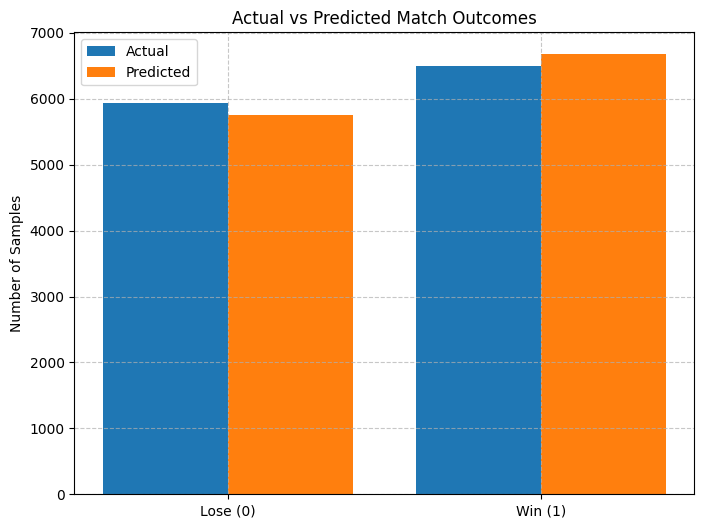

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count actual and predicted values
actual_counts = y_test.value_counts().sort_index()
predicted_counts = pd.Series(y_pred).value_counts().sort_index()

# Plot side-by-side bar chart
labels = ['Lose (0)', 'Win (1)']
x = range(len(labels))   # x = [0, 1]   

plt.figure(figsize=(8, 6))
plt.bar(x, actual_counts, width=0.4, label='Actual', align='center')
plt.bar([i + 0.4 for i in x], predicted_counts, width=0.4, label='Predicted', align='center')
#Plots the predicted class distribution with a slight shift to the right (+0.4) so that they 
#appear side-by-side next to the actual bars.
plt.xticks([i + 0.2 for i in x], labels)
plt.ylabel('Number of Samples')
plt.title('Actual vs Predicted Match Outcomes')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)  #Adds a dashed grid to improve readability.
plt.show()

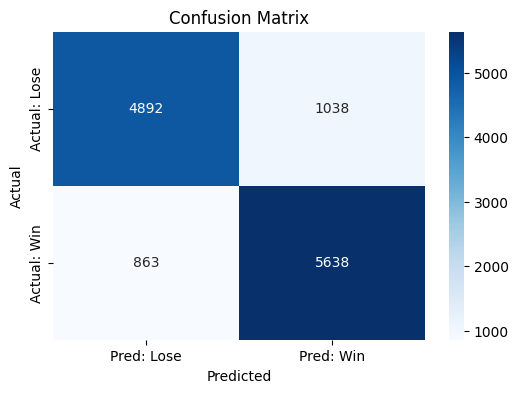

In [65]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred: Lose', 'Pred: Win'],
            yticklabels=['Actual: Lose', 'Actual: Win'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
